## Petrolib
This is a python software package designed to help geoscientists perform quick formation evaluation workflow by estimating reservoir petrophysical parameters such as:

Volume of Shale using various methods like Clavier, Stieber and Larionov methods

Porosity - Effective and Total porosities using the Density and Wyllie’s sonic methods.

Water Saturation - using both archie and simmandoux methods

Permeability

In addition to estimating these parameters, log plots are automatically displayed for proper interpretation. Also a pay summary result is generated in XLSX to help quantify the over-all quality of reservoirs.

## Petroeval
This package was created to aid and automate petrophysical interpretation of well logs. It helps in the reading of las files, estimating petrophysical properties like the volume of shale, porosity, log permeability, water and oil saturation. It also aids in the visualization of these logs by plotting dynaminc logs to depth.

This package also provides machine learning support by helping to predict and estimate missing well log data from other wells. Lithology values can be predicted as well as the lithofacies of such wells to depth.

This package also contains multiple functions that can help in machine learning data preparation and preprocessing stages. The functions are used in the creation of the package and are also reusable by individual users for their needs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import petrolib
import petroeval as pet


# Petrolib

### File Reader

In [2]:
from pathlib import Path
from petrolib import procs
from petrolib import file_reader as fr
from petrolib.workflow import Quanti
from petrolib.plots import tripleCombo, Zonation, plotLog
#from petrolib.file_reader import load_las

In [3]:
#well_path = Path(r"C:\Users\USER\Desktop\REX LOGS\Rex-2.las")
#tops_path = Path(r'./well tops.csv')


In [4]:
#df, las = fr.load_las(well_path, return_csv=True )

In [5]:
#las.well.WELL.value

In [6]:
#for item in las.well:
   # print(f"{item.descr} ({item.mnemonic}): {item.value}")

In [7]:
#for curve in las.curves:
   # print(curve.mnemonic)

In [8]:
df = pd.read_csv("Desktop/REX LOGS/REX_WELL.csv", header=0)

In [9]:
df

,CAL,DEPTH,GR,LL9S,LLD,NPHI,POR,RHOB,SONIC,WELL
0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-001
1,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-001
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-001
3,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-001
4,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-001
...,...,...,...,...,...,...,...,...,...,...
201790,NaN,11398.0,183.8156,NaN,NaN,0.1761,NaN,2.0447,98.0756,AKASO-012-ST1
201791,NaN,11398.5,183.8156,NaN,NaN,0.1761,NaN,2.0447,98.2908,AKASO-012-ST1
201792,NaN,11399.0,183.8156,NaN,NaN,0.1761,NaN,2.0447,98.2231,AKASO-012-ST1
201793,NaN,11399.5,183.8156,NaN,NaN,0.1761,NaN,2.0447,98.4526,AKASO-012-ST1


In [10]:
df.describe()

,CAL,DEPTH,GR,LL9S,LLD,NPHI,POR,RHOB,SONIC
count,116484.000000,201795.000000,148383.000000,52023.000000,124924.000000,127669.000000,12960.000000,136747.000000,92613.000000
mean,12.496004,6628.119490,61.531052,8.181403,24.834176,1.108061,0.288396,39.313265,103.935216
std,2.317655,3440.812898,27.303142,28.361775,183.352624,5.277806,0.062935,118.194946,13.876935
min,-1.860800,0.000000,-14.785700,0.075600,0.064900,-4.026700,0.033100,0.255100,-9.000000
25%,12.000000,4014.500000,36.510100,1.415150,1.590300,0.242000,0.260500,2.132500,95.250000
50%,12.236400,6728.500000,54.698900,2.510300,2.612800,0.293900,0.295000,2.197100,104.047600
75%,13.164100,9251.000000,88.330100,8.058100,13.715725,0.373200,0.319900,2.319300,111.500000
max,24.298600,15000.000000,304.205900,1935.597000,26536.019500,52.006200,0.734800,416.000000,210.500000


In [11]:
df['WELL'].unique()

array(['AKASO-001', 'AKASO-013', 'AKASO-002', 'AKASO-003', 'AKASO-004',
       'AKASO-007', 'AKASO-008', 'AKASO-009', 'AKASO-010',
       'AKASO-012-ST1'], dtype=object)

## Interp

### Cross plot
Plots the cross plot relationship of density against porosity on compatible scales to facilitate in identification of reservoir type and its fluid type.

This code was initially written by Yohanes Nuwara but was modified to give the resulting plot a more classic and pretty view.

Parameters
:
df (pd.DataFrame) – Dataframe of well

column_x (str) – Porosity column

column_y (str) – Density column

hue (str) – Column to color code the scatter plot by

color_code (str default None) – Color code typing. If ‘num’, arg hue must be a continuous column. If ‘cat’, argument hue must be a categorical column

figsize (tuple) – Size of plot

rhob_fluid (float, default 1.0) – Fluid density

res_name (str) – Reservoir name

cmap (str) – color map

Return type
:
A plot showing the neutron-density cross plot

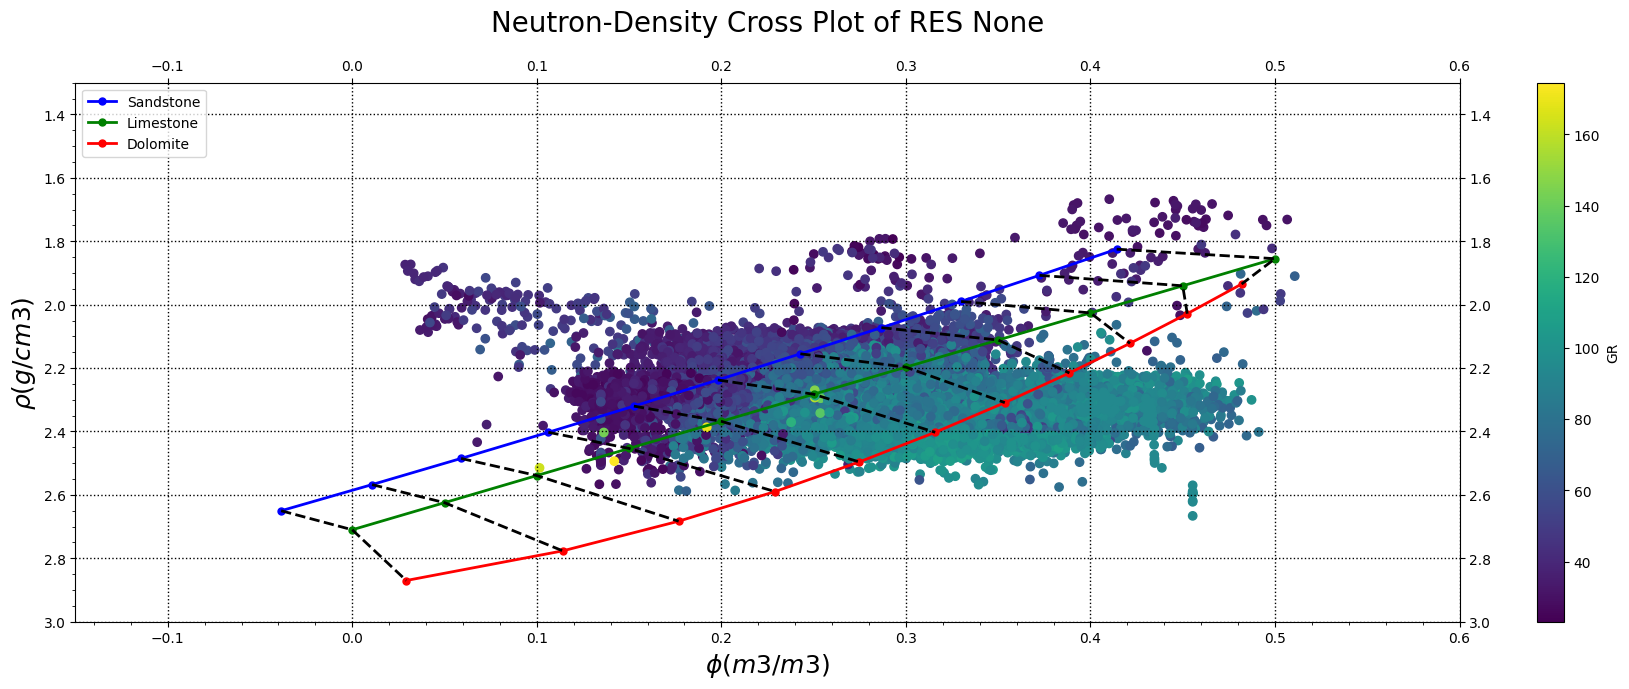

In [12]:
grouped = df.groupby('WELL')

# Selecting one well out of the other wells
selected_well = 'AKASO-002'
well_data = grouped.get_group(selected_well)

from petrolib.interp import crossPlot
crossPlot(well_data, column_x='NPHI', column_y='RHOB', color_code='num', hue='GR')

### Plot Pickett
Plot Pickett plot based on a pattern recognition approach to solving Archie’s equation. The resistivity and porosity logs are plotted on a logarithmic scales to evaluate formation characteristics of conventional, granular reservoirs. Read more here: https://wiki.seg.org/wiki/Pickett_plot

Parameters
:
df (pd.DataFrame) – Dataframe

rt (str) – Resistivity column

rwa (float default 0.03) – Formation water resisitivity

a (float default, 1.) – Turtuosity factor

m (float default 2.) – Cementation factor

n (float default 2.) – Saturation exponent

res_name (str) – Reservoir/Zone name

figsize (tuple) – Size of plot

hue (str) – Column to color code the scatter plot by.

color_code (str default None) – Color code typing. If ‘num’, arg hue must be a continuous column If ‘cat’, argument hue must be a categorical column if None, there is no color coding

cmap (str) – Color map option

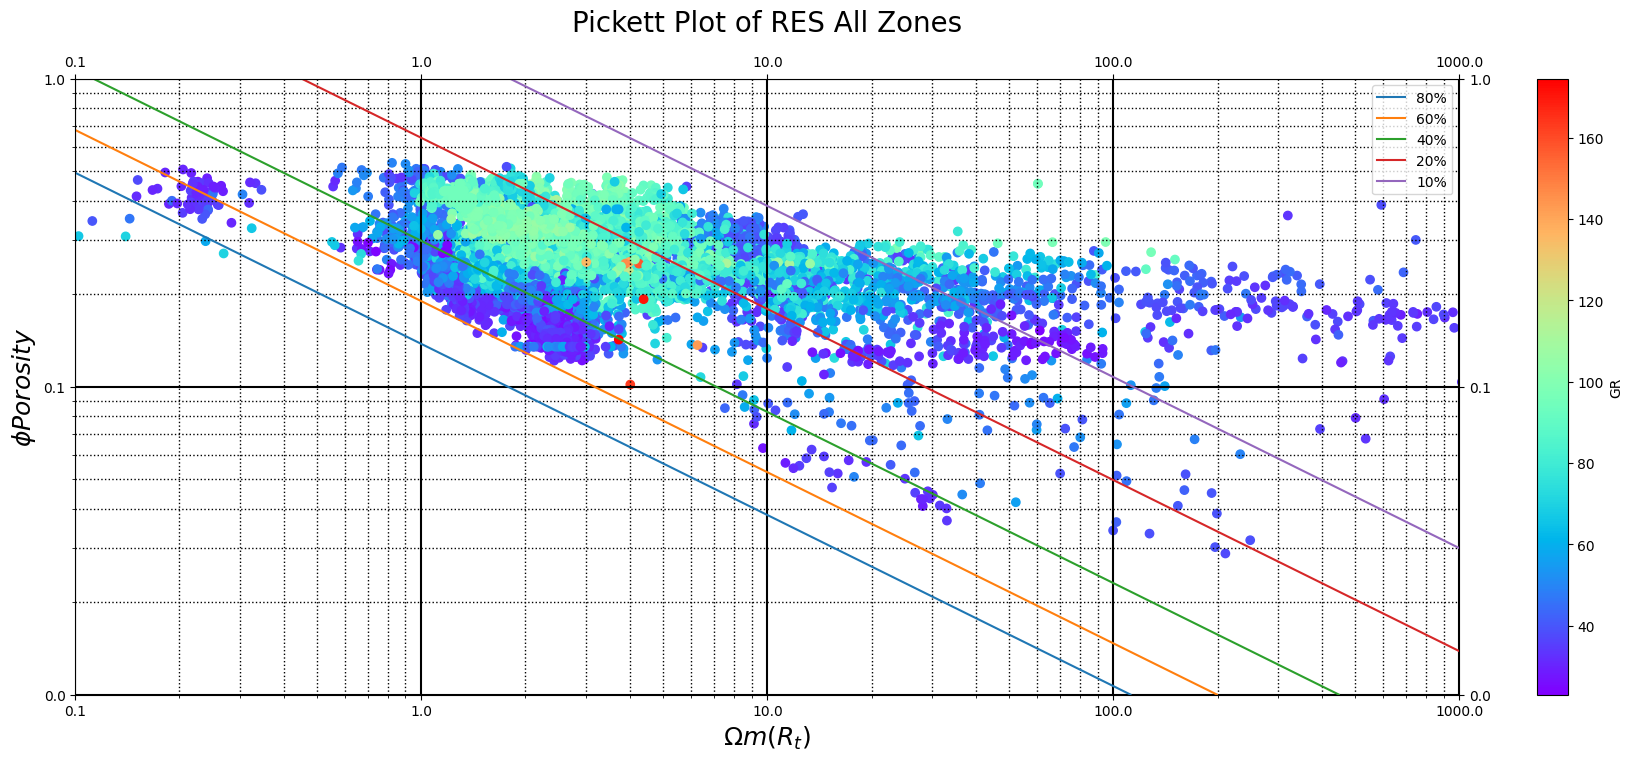

In [13]:
from petrolib.interp import picketPlot
picketPlot(well_data, rt='LLD', por='NPHI',res_name='All Zones', color_code='num', hue='GR', cmap='rainbow')

## Plots

### Reservoir Zones
This is a zonation class that extract zone/reservoir information from the file. This information may include top, bottom and zone/reservoir name. This information can be accessed when an instance of Zonation object is called.

df
Dataframe of well data

Type
:
pd.DataFrame

zones
A optional attribute containing list of dictionaries that holds zone information If None, path must be supplied

Type
:
list of dictionaries, default None

path
A csv file containing reservoir info. To be able to use this, the information in the file should be entered in the following format

top, bottom, zonename 100, 200, RES_A 210, 220, RES_B

If None, zone must be passed

Type
:
Path or str, default None

### Example
from petrolib.plots import Zonation
zones = Zonation(df, path='./well tops.csv')
zones = Zonation(df, zones = [{'RES_A':[3000, 3100]}, {'RES_B':[3300, 3400]}])

### get reservoir information by calling the Zonation object
#ztop = top ; zbot = base; zn = zonename ; fm = formation mids to place zone name in plot
ztop, zbot, zn, fm = zones()

### Plots log curves with zonation track.

Parameters
:
depth (str) – Depth column

logs (list of str) – A list of logs curves to include in plot

top (float) – Minimum depth to zoom on

bottom (float) – Maximum depth to zoom on

title (str) – Plot title

figsize (tuple) – Size of plot

Example

Zonation.plotZone('DEPTH', ['GR', 'RT', 'RHOB', 'NPHI', 'CALI'], 3300, 3600, 'Volve')

### Plots location of wells The longitude and latitude must be available in the LAS files
from petrolib.plots import plotLoc
plotLoc(data=[las], area='Nigeria', label=['Rex-2'], withmap=True, figsize=(30, 10))

## Logs
Plots log curves singly. To plot overlay plots use plots.plotLogs or plots.plotLogFacies

Parameters
:
df (pd.DataFrame) – Dataframe

depth (str) – Depth column

logs (list of str) – A list of logs curves to include in plot

top (float) – Minimum depth to zoom on

bottom (float) – Maximum depth to zoom on

title (str) – Plot title

figsize (tuple) – Size of plot

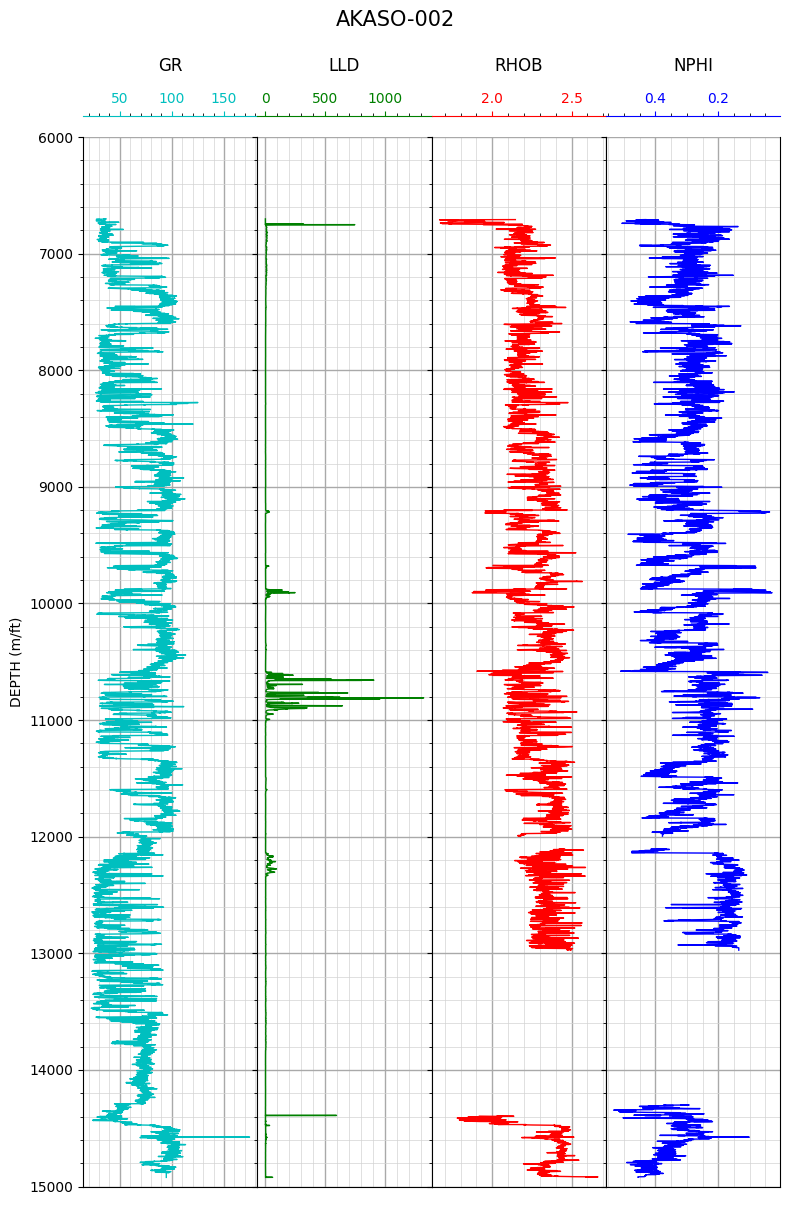

In [14]:
plotLog(well_data, 'DEPTH', ['GR', 'LLD', 'RHOB', 'NPHI'], 6000, 15000, 'AKASO-002')


In [15]:
#plotLog(well_data,'DEPTH', ['NPHI'], 6000, 15000, 'Akaso-002')

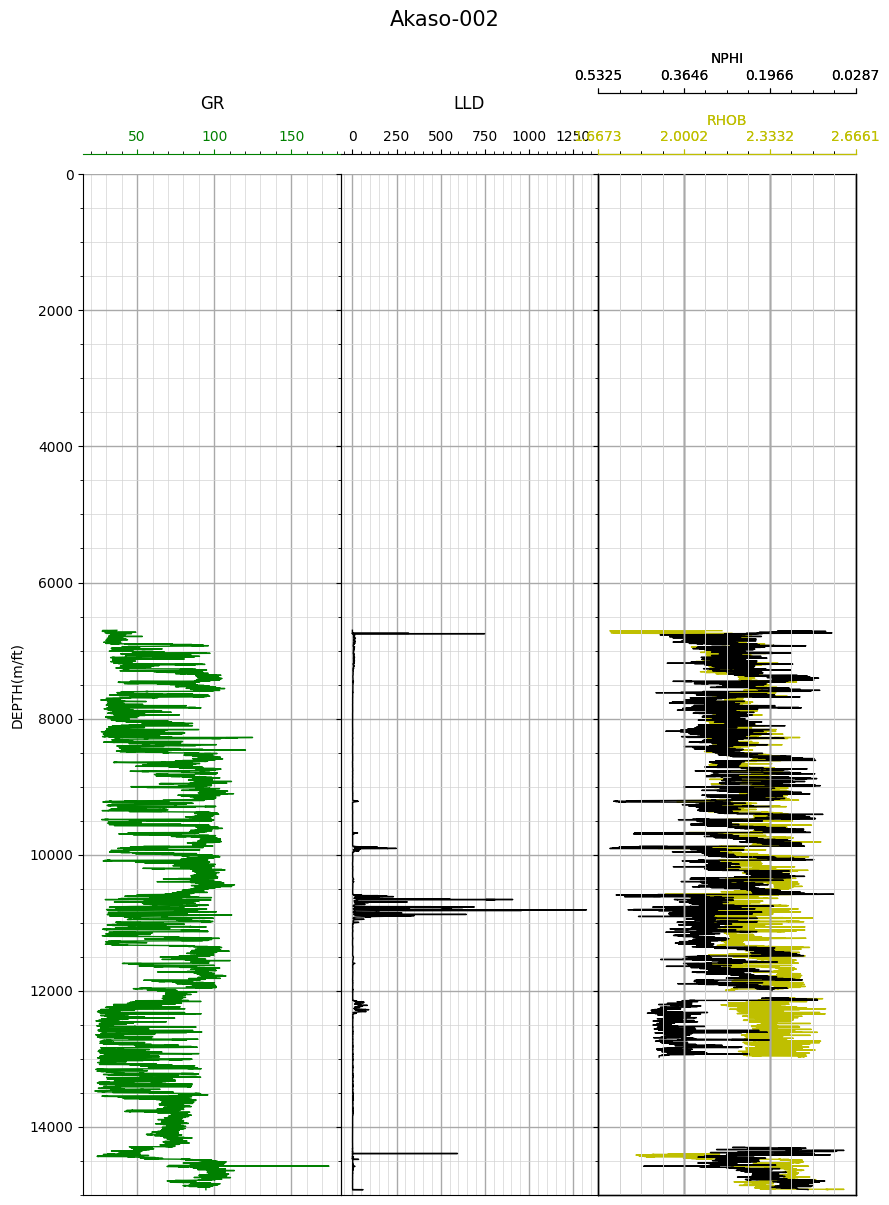

In [16]:
from petrolib.plots import plotLogs
plotLogs(well_data, 'DEPTH', ['GR', 'LLD', ['RHOB', 'NPHI']], top=well_data.DEPTH.min(),
                       bottom=well_data.DEPTH.max(), figsize=(9, 12), title='Akaso-002')

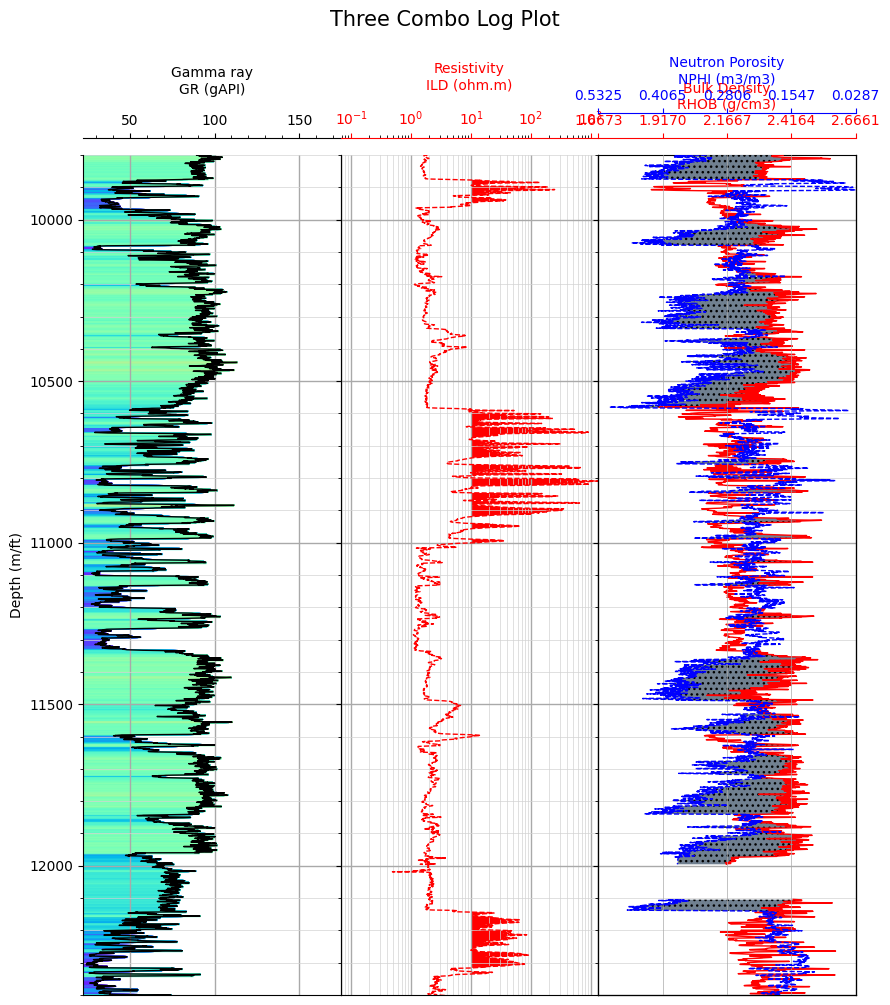

In [17]:
tripleCombo(well_data, 'DEPTH', 'GR', 'LLD', 'NPHI', 'RHOB', ztop=9800,
                    zbot=12400, res_thres=10, fill='right', palette_op='rainbow', limit='left')

## Procs

Models lithofacies from Gamma ray log specific to a particular environment

Parameters
:
df (pd.DataFrame) – dataframe

gr (str) – Gamma ray log column

env (str) – Environment type. Either siliciclastic or carbonate * ‘SS’ for Siliclastic (Shale and Sandstone) environment * ‘CO’ for carbonate (Anhydrite, Limestone, Dolomite, Sandstone, Shale) environment

Example

In [18]:
from petrolib.procs import model_facies
model_facies(well_data, gr='GR', env='SS')

,CAL,DEPTH,GR,LL9S,LLD,NPHI,POR,RHOB,SONIC,WELL,litho
33264,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33265,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33266,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33267,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33268,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
...,...,...,...,...,...,...,...,...,...,...,...
63260,NaN,14998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63261,NaN,14998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63262,NaN,14999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63263,NaN,14999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale


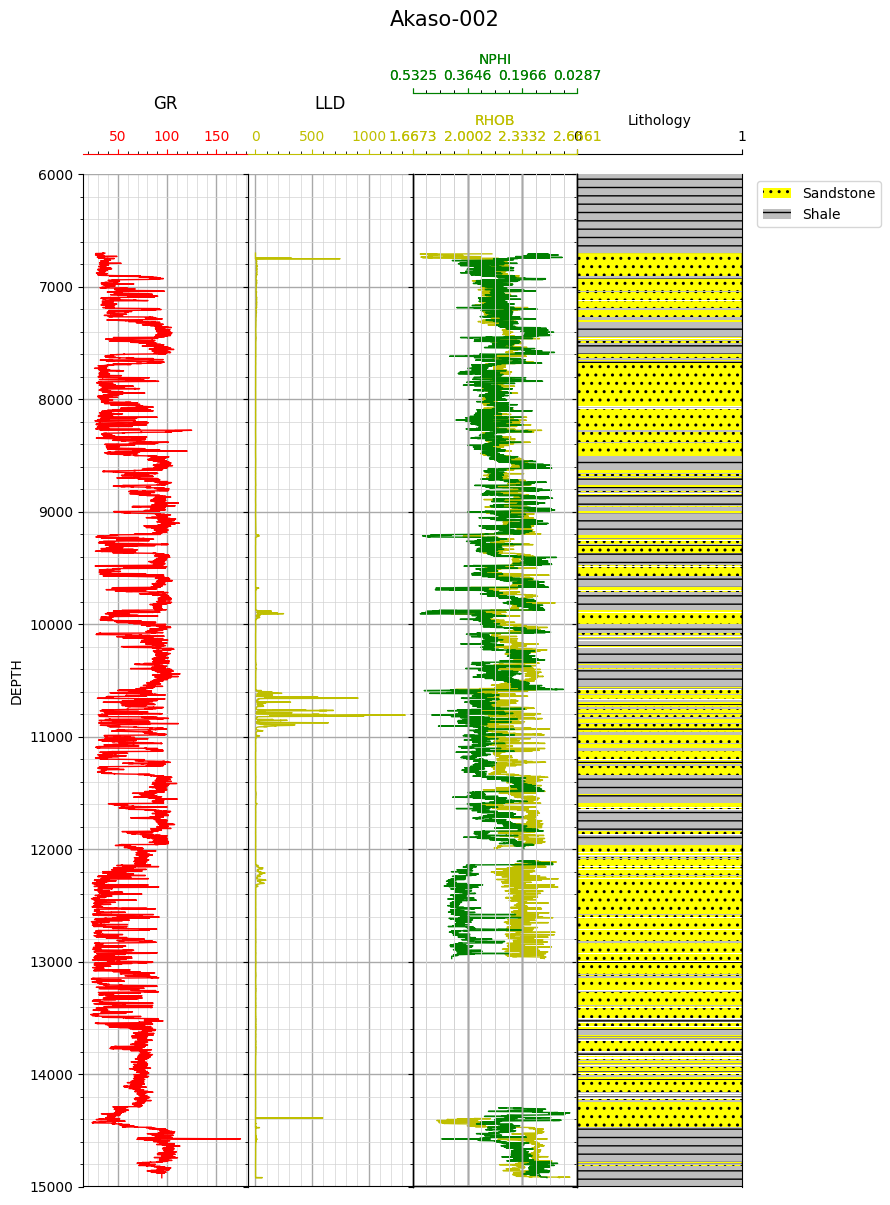

In [19]:
from petrolib.plots import plotLogFacies
plotLogFacies(well_data, 'DEPTH', ['GR', 'LLD', ['RHOB', 'NPHI']], facies='litho', top=6000.0,
                        bottom=15000.0, figsize=(9, 12), title='Akaso-002')

Function to preprocess data before beginning petrophysics workflow. This processing workflow uses conventional values for the log curves. To use user-defined preprocessing method , refer to the petrolib.data.procs.trim()

Parameters
:
df (pd.DataFrame) – dataframe object

gr (str) – Gamma ray column

rt (str) – Resistivity column

nphi (str) – Neutron porosity column

rhob (str) – Bulk density column

sonic (str, default None) – Sonic column (optional)

trim (str default 'both') – Conditions for trim arbitrary values * ‘max’ : to trim values higher than conventional maximum values * ‘min’ : to trim values lower than conventional lower values * default ‘both’ : to trim both lower and higher values to conventional high and lower values

Return type
:
A new copy of dataframe containing processed data

Example

In [20]:
from petrolib.procs import process_data
AK2 = process_data(well_data, 'GR', 'LLD', 'NPHI', 'RHOB')
AK2.describe()

,CAL,DEPTH,GR,LL9S,LLD,NPHI,POR,RHOB,SONIC
count,16317.00000,30001.000000,16441.000000,0.0,16441.000000,13554.000000,0.0,13368.000000,11552.000000
mean,12.56464,7500.000000,67.099617,NaN,7.991113,0.282074,NaN,2.265082,105.865773
std,3.30924,4330.343525,24.190838,NaN,43.830854,0.080548,NaN,0.114382,13.288781
min,3.21880,0.000000,22.529900,NaN,0.200000,0.028700,NaN,1.950000,-0.125000
25%,9.50590,3750.000000,42.815200,NaN,1.536700,0.228325,NaN,2.175400,97.750000
50%,12.75000,7500.000000,71.619600,NaN,2.072600,0.275200,NaN,2.271750,104.625000
75%,14.25000,11250.000000,89.663000,NaN,3.203400,0.340900,NaN,2.351900,113.000000
max,23.67190,15000.000000,150.000000,NaN,1323.995000,0.450000,NaN,2.666100,187.625000


Function to rename the log curves in order to maintain petrophysics conventions

Parameters
:
df (pd.DataFrame) – dataframe object

DEPTH (str) – Depth column

GR (str) – Gamma ray column

RT (str) – Resistivity column

NPHI (str) – Neutron porosity column

RHOB (str) – Bulk density column

DT (str, default None) – Sonic column (optional)

Return type
:
Returns data of renamed log curves

Example

In [21]:
from petrolib.procs import set_alias
well_data = set_alias(well_data, 'DEPT', 'GR','LLD', 'NPHI', 'RHOB')
print(well_data.columns)

Index(['CAL', 'DEPTH', 'GR', 'LL9S', 'RT', 'NPHI', 'POR', 'RHOB', 'SONIC',
       'WELL', 'litho'],
      dtype='object')


Function to preprocess data by trimming arbitrary values

Parameters
:
df (pd.DataFrame) – Dataframe

col (str) – Log curve to trim its values

lower (int or float) – Lower limit or minimum value

upper (int or float) – Upper limit or maximum value

Return type
:
Dataframe with user defined log limits

Example

In [22]:
from petrolib.procs import trim
trim(well_data, 'GR', lower=0, upper=150)

,CAL,DEPTH,GR,LL9S,RT,NPHI,POR,RHOB,SONIC,WELL,litho
33264,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33265,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33266,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33267,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33268,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
...,...,...,...,...,...,...,...,...,...,...,...
63260,NaN,14998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63261,NaN,14998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63262,NaN,14999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63263,NaN,14999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale


## Stats

A correlation class for pearson and chatterjee method of statistical significance.

Parameters
:
df (pd.DataFrame) – Takes in only the dataframe

corr(method: str = 'chatterjee')[source]
Function to calculate the linear (Pearson’s) and non-linear (Chatterjee’s) relationships between log curves. Relationship between well logs are usually non-linear.

Parameters
:
method (str, default 'chatterjee') –

Method of correlation. {‘chatterjee’, ‘pearsonr’, ‘linear’, ‘nonlinear’}

’linear’ is the same as ‘pearsonr’

’nonlinear’ is the same as ‘chatterjee’

Return type
:
Correlation matrix of all possible log curves combination

Example

In [23]:
from petrolib.stats import Correlation
corr = Correlation(well_data)
v = corr.corr(method='chatterjee')

In [24]:
v

,CAL,DEPTH,GR,LL9S,RT,NPHI,POR,RHOB,SONIC,WELL,litho
CAL,0.999946,0.984752,0.763667,0.984752,0.749732,0.821102,0.984752,0.801499,0.834077,0.975781,0.955202
DEPTH,0.855307,0.999900,0.736512,0.999900,0.756203,0.807807,0.999900,0.831816,0.875259,0.998529,0.981271
GR,0.810570,0.968414,0.999945,0.968414,0.745973,0.814140,0.968414,0.829762,0.817272,0.952918,0.947799
LL9S,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RT,0.782562,0.982494,0.717296,0.982494,0.999945,0.780656,0.982494,0.780693,0.804475,0.971447,0.946057
NPHI,0.894996,0.975482,0.875709,0.975482,0.861217,0.999955,0.975482,0.836211,0.877375,0.965091,0.957895
POR,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RHOB,0.880245,0.977428,0.887215,0.977428,0.881094,0.835561,0.977428,0.999955,0.858469,0.966438,0.962268
SONIC,0.882322,0.985724,0.885721,0.985724,0.901375,0.887608,0.985724,0.885079,0.999961,0.978765,0.975134
WELL,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


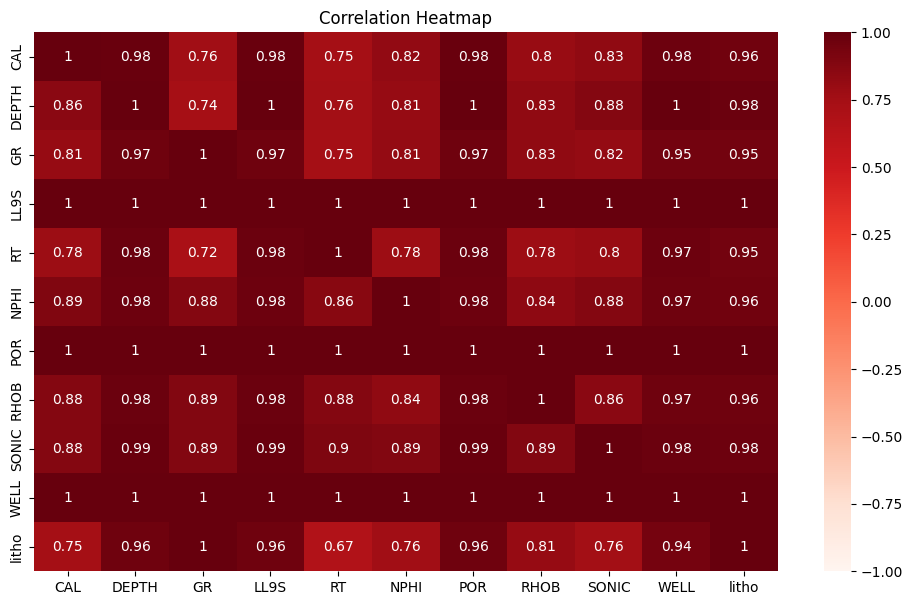

In [25]:
#Plots the heat map of Correlation Matrix
corr = Correlation(well_data)
v = corr.corr(method='chatterjee')
corr.plot_heatmap(cmap='Reds')

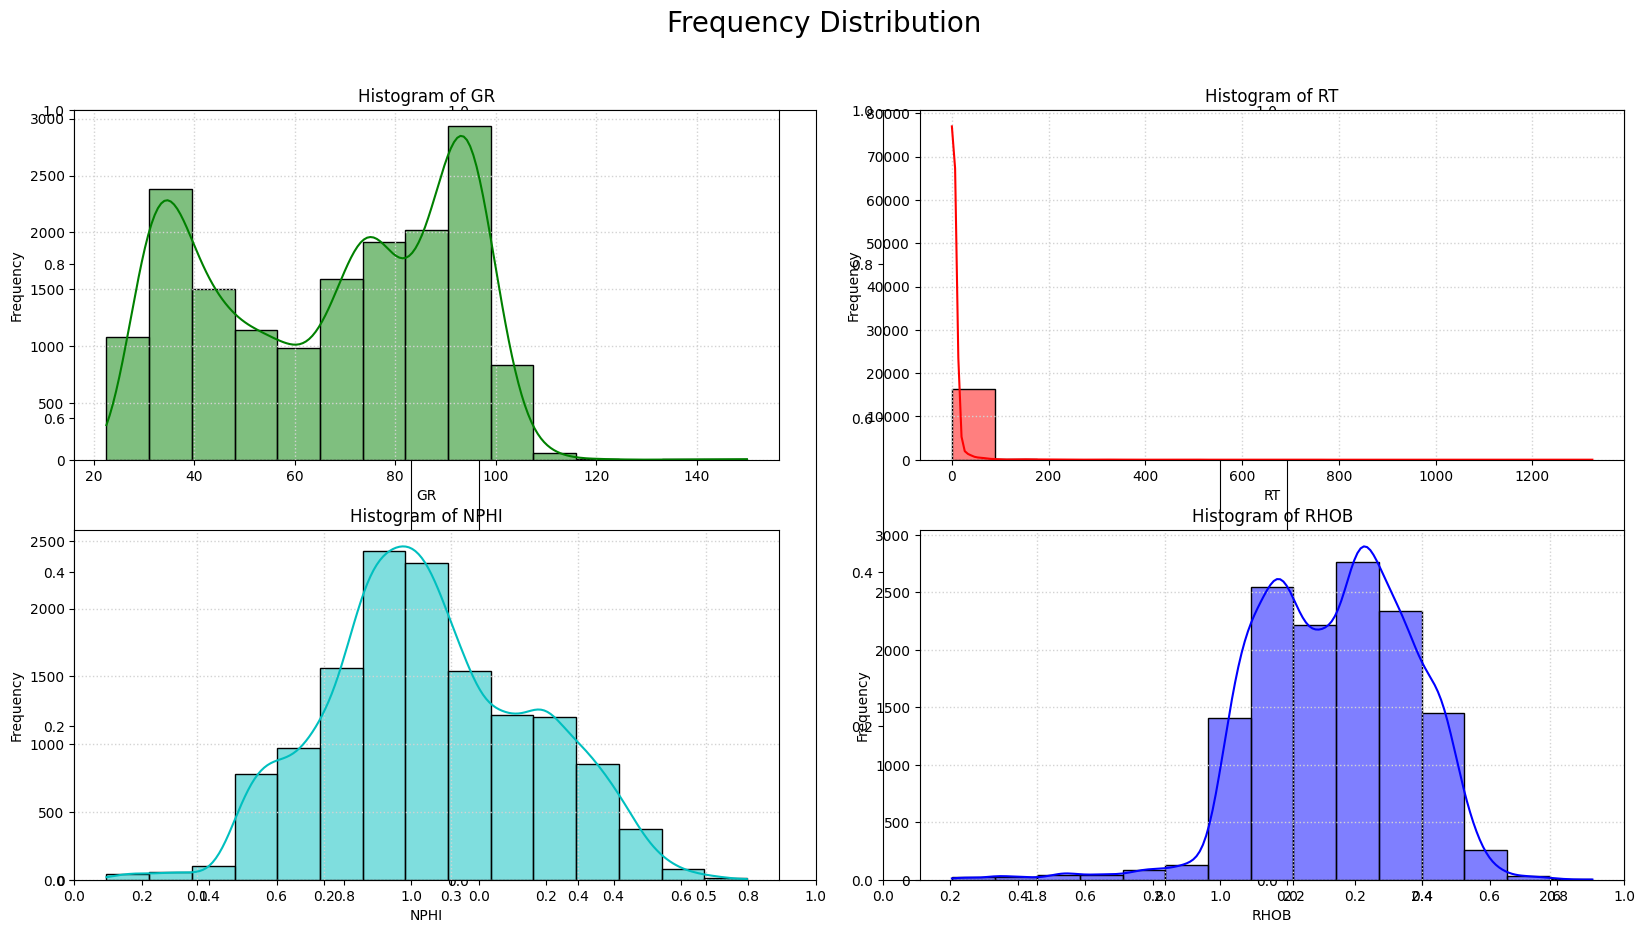

In [26]:
from petrolib.stats import displayFreq
displayFreq(well_data, 'GR', 'RT', 'NPHI', 'RHOB', bins=15, figsize=(20,10))

## Workflow

Class to petrophysics workflow to evaluate any number of reservoirs of interest. Computes IGR/VSH, Total and Effective Porosities, Water and Hydrocarbon Saturation, Permeability

df
Dataframe of data

Type
:
pd.DataFrame

zonename
List of zonenames. Will be accessed from the zonation file passed into Zonation class

Type
:
list

ztop
Tops of the reservoirs. Will be accessed from the zonation file passed into Zonation class

Type
:
list

zbot
Bottoms of the reservoirs. Will be accessed from the zonation file passed into Zonation class

Type
:
list

f_mids
Formation mids to help place the zonename in the plots. Will be accessed from the zonation file passed into Zonation class

Type
:
list

depth
Depth column

Type
:
str

gr
Gamma ray column

Type
:
str

rt
Resistivity column

Type
:
str

nphi
Neutron porosity column

Type
:
str

rhob
Bulk density column

Type
:
str

sonic
Sonic column (optional)

Type
:
str default None

use_mean
For cutoff. Whether to use mean of GR in IGR/VSH computation or not. If None, uses either median or average value

Type
:
bool default None

use_median; bool default None
For cutoff. Whether to use median of GR in IGR/VSH computation or not. If None, uses either mean or average value

In [27]:
well_data

,CAL,DEPTH,GR,LL9S,RT,NPHI,POR,RHOB,SONIC,WELL,litho
33264,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33265,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33266,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33267,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
33268,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
...,...,...,...,...,...,...,...,...,...,...,...
63260,NaN,14998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63261,NaN,14998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63262,NaN,14999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale
63263,NaN,14999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AKASO-002,Shale


In [28]:
from petrolib.plots import Zonation
#contact_path = Path(r"C:\Users\USER\Desktop\REX LOGS\REX-02 Top.csv")
#zones = Zonation(well_data, path=contact_path)
zones = Zonation(well_data, zones = [{'RES_A':[9750.1, 9900.1]}, {'RES_B':[10600.1, 10920.1]}, {'RES_C':[12140.1, 12310.1]}])

In [29]:
#get reservoir information by calling the Zonation object
#ztop = top ; zbot = base; zn = zonename ; fm = formation mids to place zone name in plot
ztop, zbot, zn, fm = zones()

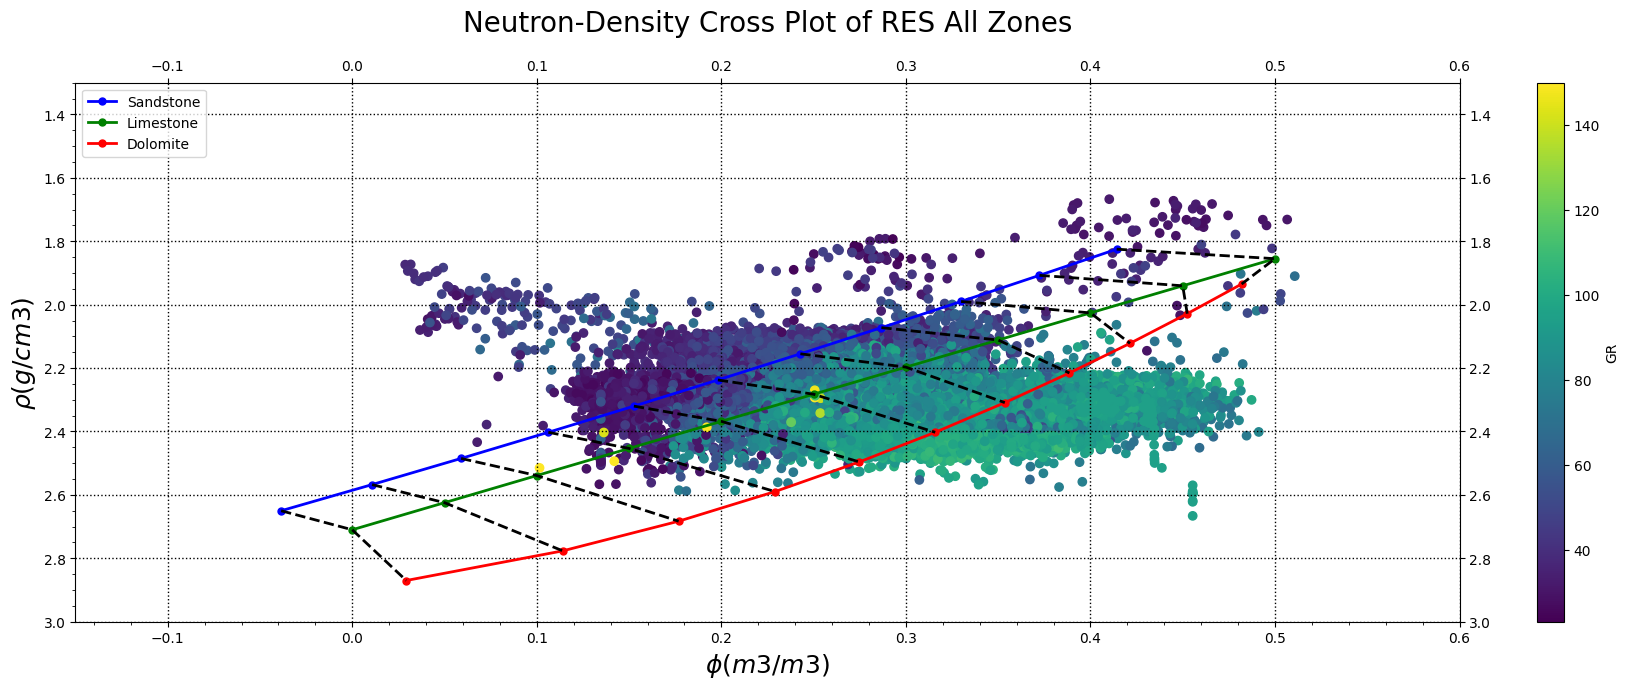

In [30]:
from petrolib.interp import crossPlot
crossPlot(well_data, column_x='NPHI', column_y='RHOB', res_name='All Zones', color_code='num', hue='GR')

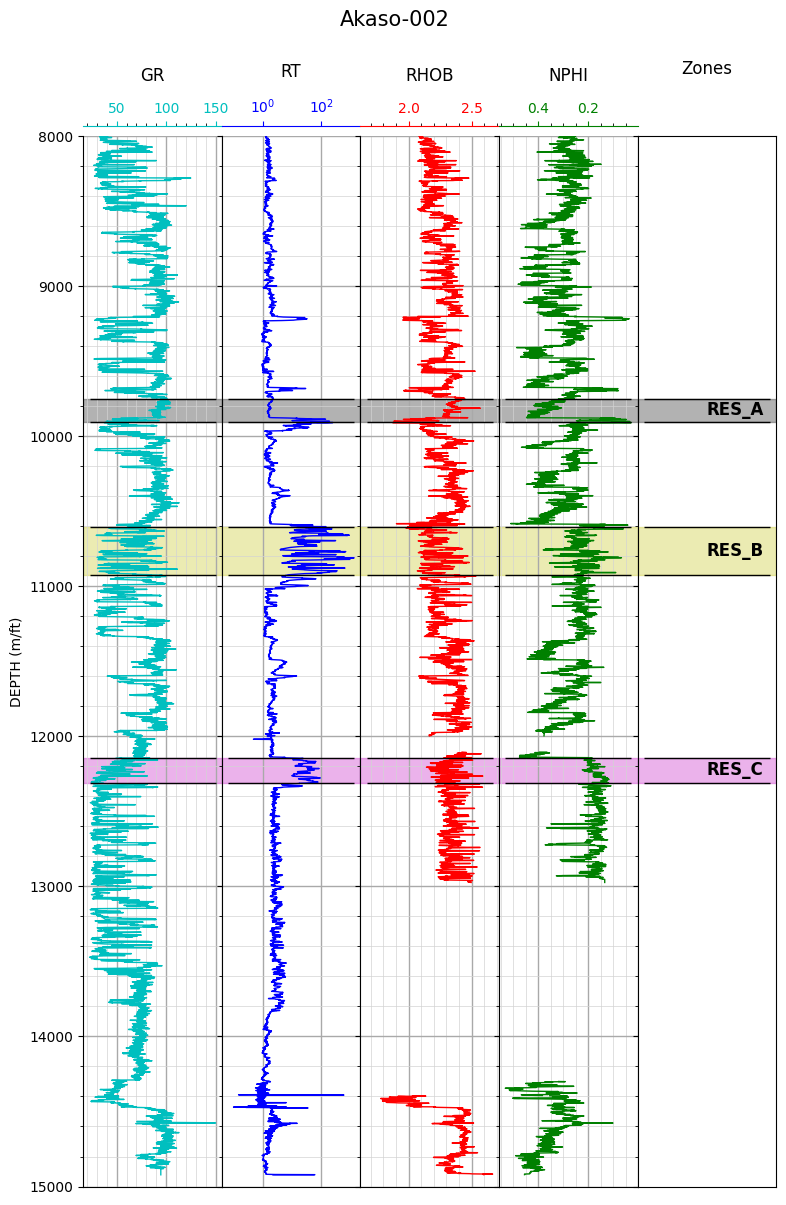

In [31]:
zones.plotZone('DEPTH', ['GR', 'RT', 'RHOB', 'NPHI'], 8000, 15000, 'Akaso-002')

In [32]:
#creating quanti class
pp = Quanti(well_data, zn, ztop, zbot, fm, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', use_mean=True)

## Volume of Shale

Computes the Volume of Shale

Parameters
:
method (str default 'linear') – Volume of Shale method. {‘linear’, ‘clavier’, ‘larionov_ter’, ‘larionov_older’, ‘stieber_1’, ‘stieber_2, ‘stieber_m_pliocene’} * Linear = Gamma Ray Index (IGR) * Larionov Tertiary * Larionov Older Rocks * Stieber (Miocene/Pliocene)

show_plot (bool default False) – Display plot if True.. Plots GR, VSH and Zone track

palette_op (str default None) – Palette option for to color code vshale plot. Check https://matplotlib.org/stable/tutorials/colors/colormaps.html

figsize (tuple default None) – Size of plot

Return type
:
Either/Both Dataframe containing the VSH and the plot if show_plot=True

In [33]:
# display data only
x = pp.vshale(method='clavier')
x = pd.concat(x)
print(x)

# display plot only
#pp.vshale(method='clavier', show_plot=True, palette_op='cubehelix', figsize=(9,12))

           CAL    DEPTH        GR  LL9S       RT    NPHI  POR    RHOB  \
52765  13.7734   9750.5   96.1304   NaN   2.1503  0.3200  NaN  2.3846   
52766  13.9062   9751.0   95.0435   NaN   2.1954  0.3140  NaN  2.3949   
52767  14.0703   9751.5   97.6522   NaN   2.1545  0.3041  NaN  2.4183   
52768  14.1797   9752.0   99.2283   NaN   2.1893  0.2987  NaN  2.4496   
52769  14.1719   9752.5  101.7826   NaN   2.1910  0.2927  NaN  2.4500   
...        ...      ...       ...   ...      ...     ...  ...     ...   
57880   8.2070  12308.0   30.2473   NaN  42.9720  0.1552  NaN  2.3238   
57881   8.2090  12308.5   29.5408   NaN  42.5866  0.1372  NaN  2.2799   
57882   8.2109  12309.0   29.2283   NaN  39.8559  0.1311  NaN  2.2608   
57883   8.2109  12309.5   28.7527   NaN  36.8583  0.1286  NaN  2.2652   
57884   8.2109  12310.0   28.8886   NaN  35.7697  0.1229  NaN  2.2745   

          SONIC       WELL      litho    VShale  
52765   96.9375  AKASO-002      Shale  0.743390  
52766   96.6875  AKASO-

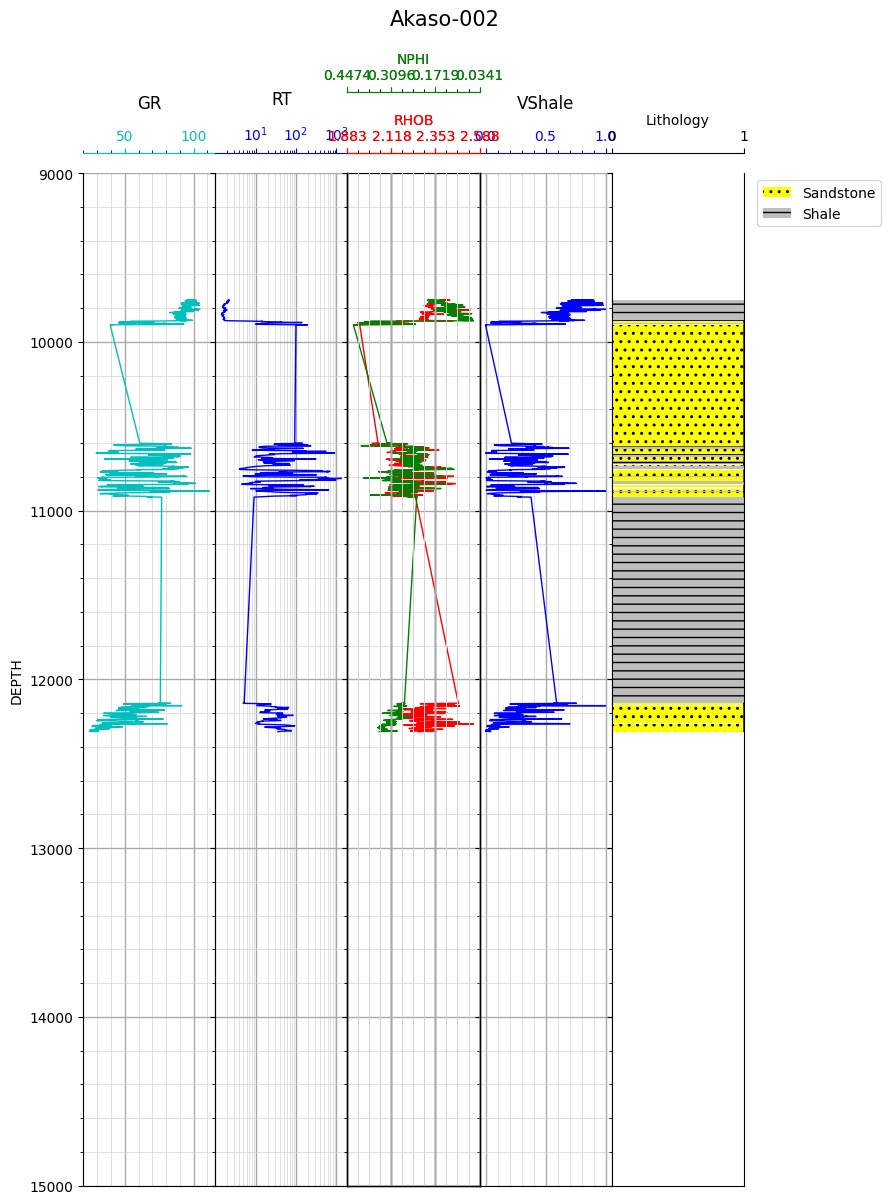

In [34]:
plotLogFacies(x, 'DEPTH', ['GR', 'RT', ['RHOB', 'NPHI'], 'VShale'], facies='litho', top=9000.0,
                        bottom=15000.0, figsize=(9, 12), title='Akaso-002')

## Porosity (PHIT & PHIE)

Computes the effective and total porosities using the ‘density’ and Wyllie’s ‘sonic’ method. To use, must have called the vshale method

Parameters
:
method (str default 'density') – Porosity method. {‘density’, ‘sonic’}

rhob_shale (float default 2.4) – Shale matrix

rhob_fluid (float default 1.0) – Fluid density

rhob_matrix (float default 2.65) – Matrix density

fzs (float default None) – Flushed zone saturation for PHIE. If None, it is calculated from rhob_fluid, rhob_shale and rhob_matrix

show_plot (bool default False) – Display plot if True.. Plots RHOB, VSH, PHIE/PHIT and Zone track

figsize (tuple default None) – Size of plot

Return type
:
Either/Both Dataframe containing the PHIE/PHIT and the plot if show_plot=True

In [35]:
# display data only
y = pp.porosity(method='density')
x = pd.concat(y)
print(x)

# display plot only
#pp.porosity(method='density', show_plot=True, figsize=(10, 12))

           CAL    DEPTH        GR  LL9S       RT    NPHI  POR    RHOB  \
52765  13.7734   9750.5   96.1304   NaN   2.1503  0.3200  NaN  2.3846   
52766  13.9062   9751.0   95.0435   NaN   2.1954  0.3140  NaN  2.3949   
52767  14.0703   9751.5   97.6522   NaN   2.1545  0.3041  NaN  2.4183   
52768  14.1797   9752.0   99.2283   NaN   2.1893  0.2987  NaN  2.4496   
52769  14.1719   9752.5  101.7826   NaN   2.1910  0.2927  NaN  2.4500   
...        ...      ...       ...   ...      ...     ...  ...     ...   
57880   8.2070  12308.0   30.2473   NaN  42.9720  0.1552  NaN  2.3238   
57881   8.2090  12308.5   29.5408   NaN  42.5866  0.1372  NaN  2.2799   
57882   8.2109  12309.0   29.2283   NaN  39.8559  0.1311  NaN  2.2608   
57883   8.2109  12309.5   28.7527   NaN  36.8583  0.1286  NaN  2.2652   
57884   8.2109  12310.0   28.8886   NaN  35.7697  0.1229  NaN  2.2745   

          SONIC       WELL      litho    VShale      PHIT      PHIE  
52765   96.9375  AKASO-002      Shale  0.743390  0.16

## Water Saturation/ Hydrocarbon saturation

Computes water and hydrocarbon saturation To use, must have called both vshale and porosity methods

Parameters
:
method (str default 'archie') – Water Saturation method. {‘archie’, ‘simmandoux’}

rw (float default 0.03) – Formation water resisitivity

a (float default, 1.) – Turtuosity factor

m (float default 2.) – Cementation factor

n (float default 2.) – Saturation exponent

show_plot (bool default False) – Display plot if True.. Plots RT, SW, PHIE/PHIT and Zone track

figsize (tuple default None) – Size of plot

Return type
:
Either/Both Dataframe containing the SW, SH and the plot if show_plot=True

In [36]:
# display data only
z = pp.water_saturation(method='archie')
x = pd.concat(z)
print(x)

# display plot only
#pp.water_saturation(method='archie', show_plot=True, figsize=(10, 12))

           CAL    DEPTH        GR  LL9S       RT    NPHI  POR    RHOB  \
52765  13.7734   9750.5   96.1304   NaN   2.1503  0.3200  NaN  2.3846   
52766  13.9062   9751.0   95.0435   NaN   2.1954  0.3140  NaN  2.3949   
52767  14.0703   9751.5   97.6522   NaN   2.1545  0.3041  NaN  2.4183   
52768  14.1797   9752.0   99.2283   NaN   2.1893  0.2987  NaN  2.4496   
52769  14.1719   9752.5  101.7826   NaN   2.1910  0.2927  NaN  2.4500   
...        ...      ...       ...   ...      ...     ...  ...     ...   
57880   8.2070  12308.0   30.2473   NaN  42.9720  0.1552  NaN  2.3238   
57881   8.2090  12308.5   29.5408   NaN  42.5866  0.1372  NaN  2.2799   
57882   8.2109  12309.0   29.2283   NaN  39.8559  0.1311  NaN  2.2608   
57883   8.2109  12309.5   28.7527   NaN  36.8583  0.1286  NaN  2.2652   
57884   8.2109  12310.0   28.8886   NaN  35.7697  0.1229  NaN  2.2745   

          SONIC       WELL      litho    VShale      PHIT      PHIE        SW  \
52765   96.9375  AKASO-002      Shale  0.7

## Permeability

Computes the permeability. To use, must have called vshale and porosity and water_saturation methods

Parameters
:
show_plot (bool default False) – Display plot if True.. Plots PHIE, Permeability and Zone track

figsize (tuple default None) – Size of plot

Return type
:
Either/Both Dataframe containing the Perm and the plot if show_plot=True

In [37]:
# display data only
x = pp.vshale(method='clavier')
y = pp.porosity(method='density')
z = pp.water_saturation(method='archie')
a = pp.permeability()
x = pd.concat(a)
print(x)

# display plot only
#pp.vshale(method='clavier')
#pp.porosity(method='density')
#pp.water_saturation(method='archie')
#pp.permeability(show_plot=True, figsize=(9, 10))

           CAL    DEPTH        GR  LL9S       RT    NPHI  POR    RHOB  \
52765  13.7734   9750.5   96.1304   NaN   2.1503  0.3200  NaN  2.3846   
52766  13.9062   9751.0   95.0435   NaN   2.1954  0.3140  NaN  2.3949   
52767  14.0703   9751.5   97.6522   NaN   2.1545  0.3041  NaN  2.4183   
52768  14.1797   9752.0   99.2283   NaN   2.1893  0.2987  NaN  2.4496   
52769  14.1719   9752.5  101.7826   NaN   2.1910  0.2927  NaN  2.4500   
...        ...      ...       ...   ...      ...     ...  ...     ...   
57880   8.2070  12308.0   30.2473   NaN  42.9720  0.1552  NaN  2.3238   
57881   8.2090  12308.5   29.5408   NaN  42.5866  0.1372  NaN  2.2799   
57882   8.2109  12309.0   29.2283   NaN  39.8559  0.1311  NaN  2.2608   
57883   8.2109  12309.5   28.7527   NaN  36.8583  0.1286  NaN  2.2652   
57884   8.2109  12310.0   28.8886   NaN  35.7697  0.1229  NaN  2.2745   

          SONIC       WELL      litho    VShale      PHIT      PHIE        SW  \
52765   96.9375  AKASO-002      Shale  0.7

## Flags
Create the {ROCK, RES, PAY} flags

To use, must have called vshale, porosity, water_saturation and permeability methods

Parameters
:
vsh_method (float) – Volume of Shale cutoff. Applied only to [‘ROCK’] flag

por_cutoff (float) – Porosity cutoff. Applied only to the [‘ROCK’, ‘RES’] flags

sw_cutoff (float) – Water Saturation cutoff. Applied only to the [‘ROCK’, ‘RES’, ‘PAY] flags

ref_unit (str default 'm') – Reference unit for measured depth. Defaults to metres

show_plot (bool default False) – Display plot if True.. Plots GR, RT, VSH, SW, Perm, NPHI/RHOB, PHIE/PHIT, [‘ROCK’, ‘RES’, ‘PAY] flags and Zonation track

palette_op (str default None) – palette option for VSH coloring. Check https://matplotlib.org/stable/tutorials/colors/colormaps.html for availabel palette options

figsize (tuple default None) – Size of plot

Return type
:
Either/Both Dataframe containing the flags and the plot if show_plot=True

In [38]:
# Display data only
y = pp.flags(por_cutoff=.12, vsh_cutoff=.5, sw_cutoff=0.8)
x = pd.concat(y)
print(x)

# Display plot only
#pp.flags(por_cutoff=.12, vsh_cutoff=.5, sw_cutoff=0.8, show_plot=True, palette_op='cubehelix', figsize=(20, 15))

           CAL    DEPTH        GR  LL9S       RT    NPHI  POR    RHOB  \
52765  13.7734   9750.5   96.1304   NaN   2.1503  0.3200  NaN  2.3846   
52766  13.9062   9751.0   95.0435   NaN   2.1954  0.3140  NaN  2.3949   
52767  14.0703   9751.5   97.6522   NaN   2.1545  0.3041  NaN  2.4183   
52768  14.1797   9752.0   99.2283   NaN   2.1893  0.2987  NaN  2.4496   
52769  14.1719   9752.5  101.7826   NaN   2.1910  0.2927  NaN  2.4500   
...        ...      ...       ...   ...      ...     ...  ...     ...   
57880   8.2070  12308.0   30.2473   NaN  42.9720  0.1552  NaN  2.3238   
57881   8.2090  12308.5   29.5408   NaN  42.5866  0.1372  NaN  2.2799   
57882   8.2109  12309.0   29.2283   NaN  39.8559  0.1311  NaN  2.2608   
57883   8.2109  12309.5   28.7527   NaN  36.8583  0.1286  NaN  2.2652   
57884   8.2109  12310.0   28.8886   NaN  35.7697  0.1229  NaN  2.2745   

          SONIC       WELL      litho    VShale      PHIT      PHIE        SW  \
52765   96.9375  AKASO-002      Shale  0.7

## Pay Summary
Computes the
net, grossand not net thicknesses

net-to-gross

average volume of shale

average porosity value

bulk volume of water

water saturation

for each of the three flags {ROCK, RES, PAY}

Parameters
:
name (str) – Name of the well

Return type
:
Displays the Pay Summary Report table

Example

In [39]:
pp.paySummary(name='AKASO-002')

,Well,Zones,Flag Name,Top,Bottom,Unit,Gross,Net,Not Net,NTG,BVW,Average VShale,Average Porosity,Average Water Saturation
0,AKASO-002,RES_A,ROCK,9750.500000,9900.000000,m,149.500000,8.970000,140.530000,0.060000,0.024908,0.058567,0.380621,0.069423
1,AKASO-002,RES_A,RES,9750.500000,9900.000000,m,149.500000,8.970000,140.530000,0.060000,0.024908,0.058567,0.380621,0.069423
2,AKASO-002,RES_A,PAY,9750.500000,9900.000000,m,149.500000,24.418333,125.081667,0.163333,0.037440,0.245190,0.294499,0.158012
3,AKASO-002,RES_B,ROCK,10600.500000,10920.000000,m,319.500000,107.332031,212.167969,0.335938,0.015121,0.056078,0.302606,0.051382
4,AKASO-002,RES_B,RES,10600.500000,10920.000000,m,319.500000,107.332031,212.167969,0.335938,0.015121,0.056078,0.302606,0.051382
5,AKASO-002,RES_B,PAY,10600.500000,10920.000000,m,319.500000,297.534375,21.965625,0.931250,0.031862,0.242445,0.245192,0.166339
6,AKASO-002,RES_C,ROCK,12140.500000,12310.000000,m,169.500000,52.844118,116.655882,0.311765,0.026647,0.054066,0.226578,0.120983
7,AKASO-002,RES_C,RES,12140.500000,12310.000000,m,169.500000,52.844118,116.655882,0.311765,0.026647,0.054066,0.226578,0.120983
8,AKASO-002,RES_C,PAY,12140.500000,12310.000000,m,169.500000,159.529412,9.970588,0.941176,0.033360,0.212879,0.187622,0.216713
